### Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')
ESR = ESR.drop(columns = ESR.columns[0]) 
ESR.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### Data Pre-processing

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


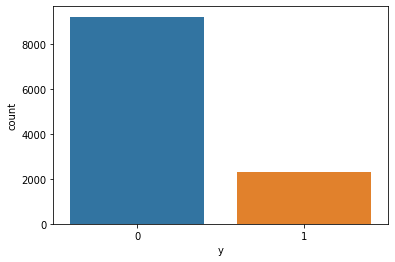

In [3]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt > 1] = 0 # NO seizure = 0  seizure = 1 so we can work on them clearly
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [4]:
ESR.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [5]:
ESR.isnull().sum().sum()

0

In [6]:
ESR.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [7]:
Y = ESR.iloc[:,178].values
Y.shape

(11500,)

In [8]:
Y[Y>1]=0
Y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
X = ESR.iloc[:,1:178].values
X.shape

(11500, 177)

In [10]:
from sklearn.utils import shuffle

ESR = shuffle(ESR)

Text(0.5, 0, 'Samples')

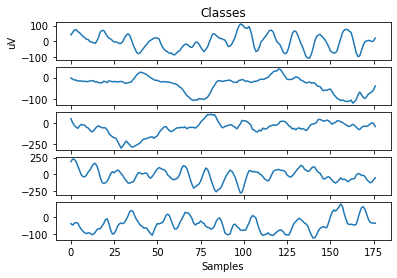

In [ ]:
plt.subplot(511)
plt.plot(X[11499,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

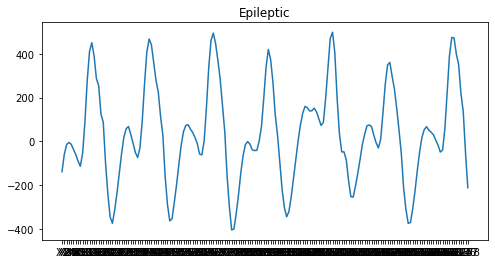

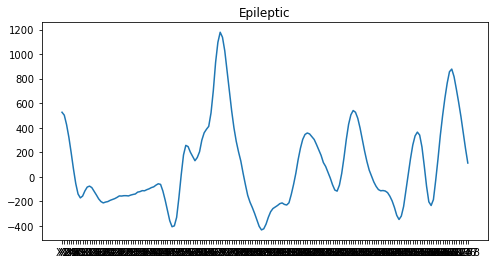

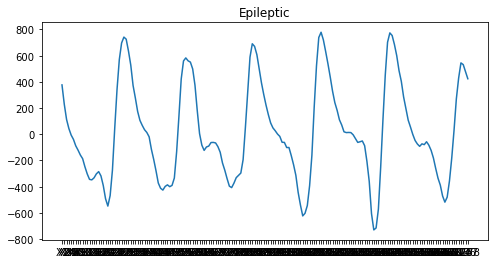

In [ ]:
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(ESR[ESR['y'] == 1].iloc[i][0:-1])) for i in range(3)];


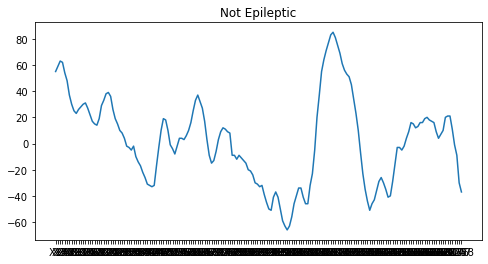

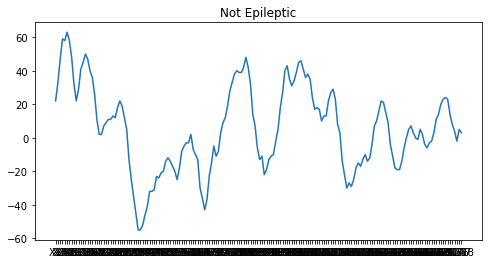

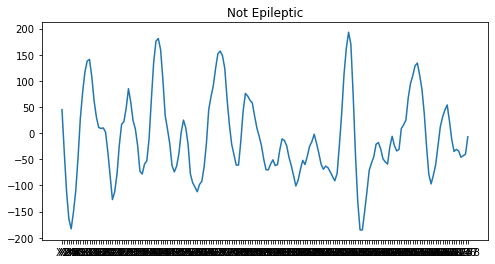

In [ ]:
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(ESR[ESR['y'] == 0].iloc[i][0:-1])) for i in range(3)];

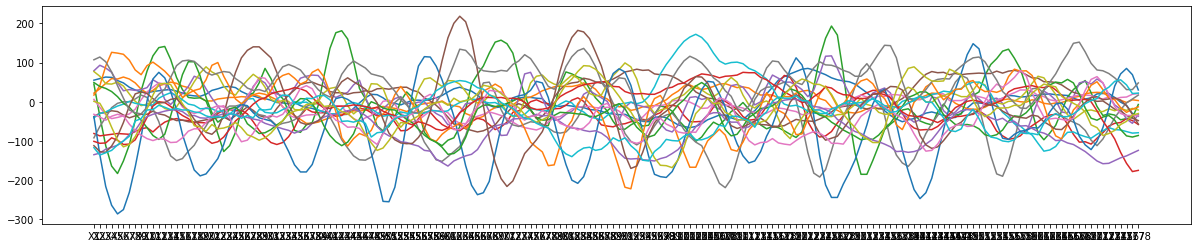

In [ ]:
plt.figure(figsize=(70,4))
plt.subplot(131)
[ plt.plot(ESR[ESR['y'] == 0].iloc[i][0:-1]) for i in range(20)];


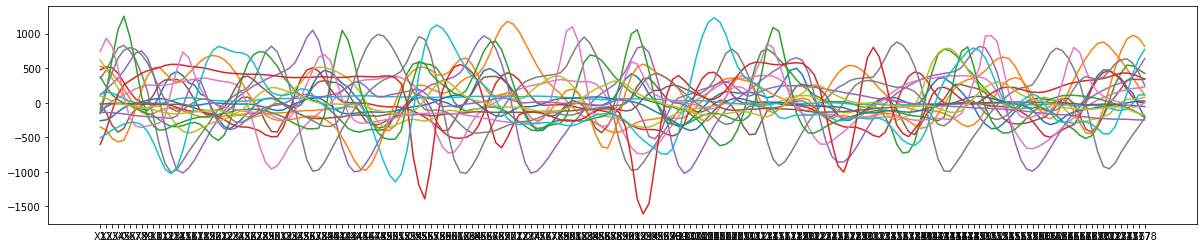

In [ ]:
plt.figure(figsize=(70,4))
plt.subplot(131)
[ plt.plot(ESR[ESR['y'] == 1].iloc[i][0:-1]) for i in range(20)];


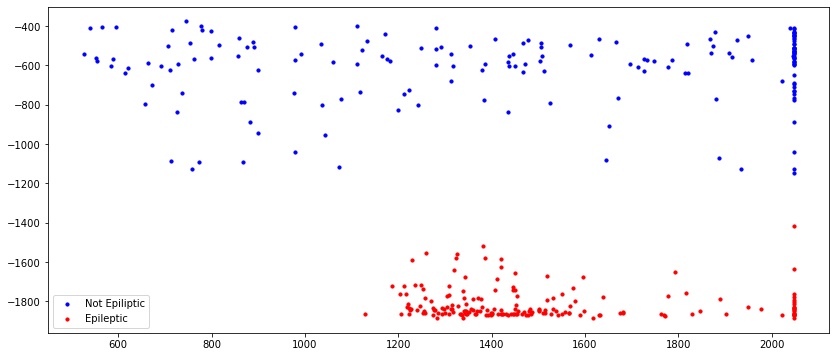

In [ ]:
#lists of arrays containing all data without y column
not_epileptic = [ESR[ESR['y']==0].iloc[:, range(0, len(ESR.columns)-1)].values]
epileptic = [ESR[ESR['y']==1].iloc[:, range(0, len(ESR.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(ESR):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(ESR, axis=1)
    min = np.min(ESR, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

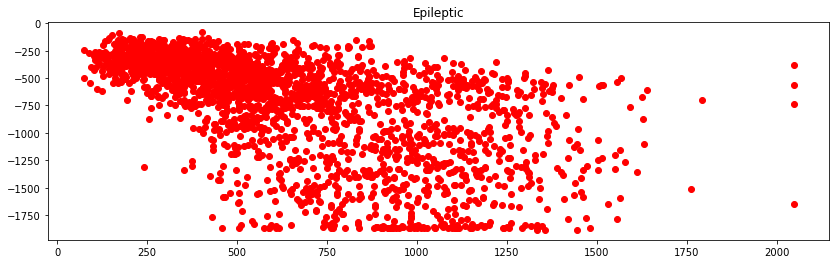

In [ ]:
#Just Epileptic
x,y = indic(ESR[ESR['y']==1].iloc[:, range(0, len(ESR.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');


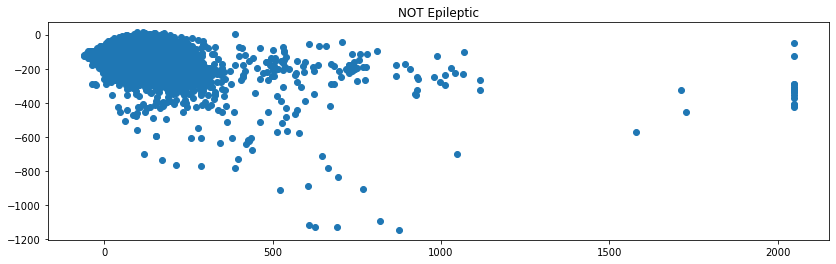

In [ ]:
#Just Not Epileptic
x,y = indic(ESR[ESR['y']==0].iloc[:, range(0, len(ESR.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_rft = regressor.predict(X_test)
acc_rft = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_rft)+'%')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round (pca.score(X_test , y_test))
print (str(acc_PCA)+'%')

72%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

92.26%


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_gnb) + '%')

95.52%


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print("Accuracy is:",(str(acc_svc)+'%'))

Accuracy is: 97.09%


In [ ]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_linear_svc) + '%')

81.57%


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'KNN', 'Naive Bayes', 'Principal Component Analysis'],
    
    'Score': [acc_log_reg, acc_svc,
              acc_knn, acc_gnb,acc_PCA ]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,97.09
3,Naive Bayes,95.52
2,KNN,92.26
0,Logistic Regression,81.61
4,Principal Component Analysis,72.00


In [ ]:
new_input1 = [ESR.iloc[9367, :177]]
new_input1

[X1      135
 X2       46
 X3      -37
 X4     -101
 X5     -153
        ... 
 X173   -299
 X174   -276
 X175   -274
 X176   -257
 X177   -253
 Name: 6223, Length: 177, dtype: int64]

In [ ]:
new_output = clf.predict(new_input1)
new_output

array([0], dtype=int64)

In [ ]:
new_output
if new_output==[1]:
    print('"yes" you might get seizure')
else:
    print('You are safe no worries :)')

You are safe no worries :)


In [ ]:
ESR.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
6518,55,59,63,62,54,48,37,30,25,23,...,10,20,21,21,11,-1,-9,-30,-37,0
8929,22,33,47,59,58,63,58,48,32,22,...,23,24,23,14,8,4,-2,5,3,0
9396,45,-37,-112,-164,-183,-151,-110,-47,28,78,...,23,-12,-35,-31,-34,-46,-43,-40,-7,0
2526,-81,-87,-85,-83,-81,-82,-83,-76,-69,-66,...,-108,-93,-79,-62,-55,-53,-43,-48,-58,0
5272,79,93,86,75,49,28,31,29,31,36,...,45,58,48,16,-8,-19,-44,-55,-32,0
10143,-38,-29,-28,-23,-25,-34,-41,-36,-32,-32,...,5,1,2,-8,-19,-23,-35,-42,-48,0
8199,6,-14,-33,-43,-40,-36,-31,-19,5,25,...,16,9,7,12,7,11,12,19,21,0
1760,-92,-63,-40,-15,-4,0,0,7,17,11,...,-98,-112,-95,-68,-41,-20,-3,7,17,0
383,77,65,46,45,50,40,20,1,-10,-6,...,-21,-25,-25,-18,-23,-17,-22,-17,-21,0
1018,-41,-30,-26,-18,-11,-6,1,-4,-7,-10,...,-93,-83,-74,-66,-71,-72,-76,-80,-79,0
